Importing libraries

In [198]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

Importing training and testing set

In [199]:
!git clone 'https://github.com/hoankm94/WaterPH.git'

fatal: destination path 'WaterPH' already exists and is not an empty directory.


In [200]:
url = '/content/WaterPH/Work/ML_training/Data/Oct21.csv'
df = pd.read_csv(url, names = ['410nm', '435nm', '460nm', '485nm', '510nm', '535nm', '560nm',
                               '585nm', '610nm', '645nm', '680nm', '705nm', '730nm', '760nm',
                               '810nm', '860nm', '900nm', '940nm', 'pH', 'Date'])

df = df.drop(['Date'], axis = 1)
df
# df.info()
# fig, ax = plt.subplots()
# ax.scatter(df['YearBuilt'][:1000], df['Price'][:1000])
# df.Price.plot.hist()

# df.head().T

,410nm,435nm,460nm,485nm,510nm,535nm,560nm,585nm,610nm,645nm,680nm,705nm,730nm,760nm,810nm,860nm,900nm,940nm,pH
0,684,496,1625,1560,1768,526,115,234,30,73,104,1181,114,280,409,486,799,231,7.2
1,683,503,1624,1557,1772,540,115,232,30,73,104,1191,116,280,413,491,807,229,7.0
2,680,497,1620,1549,1766,534,115,232,68,72,104,1195,103,346,447,272,807,231,6.9
3,678,500,1609,1534,1758,535,114,231,53,72,105,1198,116,313,411,489,810,231,6.8
4,678,500,1609,1534,1758,535,114,231,53,72,105,1198,116,313,411,489,810,231,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,561,174,1328,1248,1426,176,96,263,53,110,107,870,93,248,312,380,619,231,5.9
119,564,179,1333,1247,1435,180,97,263,51,110,107,865,92,243,323,383,619,229,5.8
120,565,179,1336,1250,1432,179,96,263,53,110,109,885,93,254,318,384,620,229,5.6
121,566,181,1327,1254,1435,180,97,266,53,111,103,887,95,255,310,390,627,232,5.5


Sort dataframe

In [201]:
df.sort_values(by=['pH'], inplace=True, ascending=True)
df.pH.head(10)

,pH
36,3.1
35,3.2
34,3.3
33,3.4
72,3.5
32,3.5
31,3.6
71,3.6
30,3.7
70,3.7


Cleaning the data

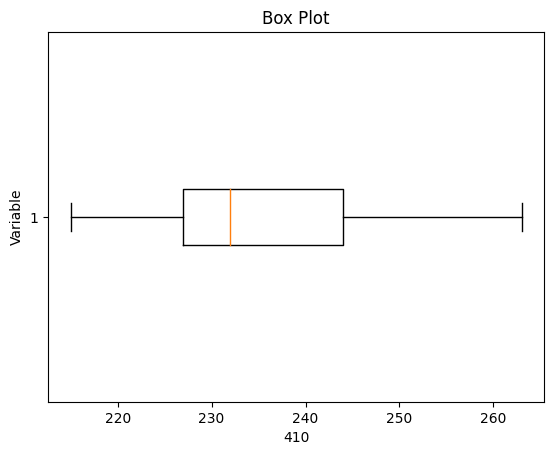

In [202]:
import matplotlib.pyplot as plt
plt.boxplot(df['940nm'], vert=False)
plt.ylabel('Variable')
plt.xlabel('410')
plt.title('Box Plot')
plt.show()

## 760nm needs cleaning

Preproccess the data

In [203]:
df_tmp = df.copy()

x = df_tmp.drop('pH', axis = 1)
y = df_tmp['pH']

# Convert data into numerical
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot", one_hot, ['Neighborhood'])], remainder='passthrough')
# transformed_x = transformer.fit_transform(x)

# Get column names after one-hot encoding
# column_names = list(transformer.get_feature_names_out())

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x) # transformed_x if used one hot
scaled_df = pd.DataFrame(scaled_data, columns= x.columns) # columns=column_names if used one hot

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state = 42)

Modelling

In [204]:
from sklearn.linear_model import Lasso
ls = Lasso(random_state = 42)
ls.fit(x_train, y_train)
ls.score(x_test, y_test)

-0.07179598519366315

In [205]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(x_train, y_train)
en.score(x_test, y_test)

0.11404530964580417

In [206]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(x_train, y_train)
rd.score(x_test, y_test)

0.39219375045992966

In [207]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7246772698617596

In [208]:
from sklearn.linear_model import LassoCV
lsCV = LassoCV()
lsCV.fit(x_train, y_train)
lsCV.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1411141297862457, tolerance: 0.01877317948717949
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26657853543127885, tolerance: 0.01877317948717949
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2912863421622802, tolerance: 0.01877317948717949
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Conv

0.38445266910126863

In [209]:
from sklearn.linear_model import LassoLarsCV
lsCV = LassoLarsCV()
lsCV.fit(x_train, y_train)
lsCV.score(x_test, y_test)

0.3819491909525118

In [210]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.33928406872498706

Make predictions after choosing a model

In [211]:
y_pred = rf.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7246772698617596

Improving model

In [212]:
# # Feature select
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import KFold

# min_features_to_select = 4  # Minimum number of features to consider
# cv = KFold(5)

# rfecv = RFECV(
#     estimator=rf, # Change model to be improved
#     step=1,
#     cv=cv,
#     scoring="r2",
#     min_features_to_select=min_features_to_select,
#     n_jobs=-1,
# )
# rfecv.fit(scaled_data, y)
# print(f"Optimal number of features: {rfecv.n_features_}")

# selected_features = rfecv.support_
# # feature_names = transformer.get_feature_names_out() # Used if one hot encoded
# feature_names = scaled_df.columns
# selected_feature_names = feature_names[selected_features]
# print(selected_feature_names)

# x_train_selected = x_train[:, selected_features]
# x_test_selected = x_test[:, selected_features]

# rf.fit(x_train_selected, y_train) # Change model to be improved
# rf.score(x_test_selected, y_test) # Change model to be improved

Manual feature select for Random Forest Regression

In [213]:
import statsmodels.formula.api as sm

# Assuming 'x' is your DataFrame with predictors and 'y' is your target variable
feature_names = x.columns

# Get predictions on the training data
y_pred_train = rf.predict(x_train)

# Calculate residuals
residuals = y_train - y_pred_train

# Create a DataFrame with predictions and residuals
df_anova = pd.DataFrame({'y_pred': y_pred_train, 'residuals': residuals})
# print(df_anova)

# Convert x_train to a DataFrame before concatenation
x_train_df = pd.DataFrame(x_train, columns=feature_names)  # Convert x_train to DataFrame

# Combine with predictors
df_anova = pd.concat([x_train_df, df_anova], axis=1)
df_anova['410nm'] = df_anova['410nm'].astype(float)
df_anova['435nm'] = df_anova['435nm'].astype(float)
df_anova['460nm'] = df_anova['460nm'].astype(float)
df_anova['485nm'] = df_anova['485nm'].astype(float)
df_anova['510nm'] = df_anova['510nm'].astype(float)
df_anova['535nm'] = df_anova['535nm'].astype(float)
df_anova['560nm'] = df_anova['560nm'].astype(float)
df_anova['585nm'] = df_anova['585nm'].astype(float)
df_anova['610nm'] = df_anova['610nm'].astype(float)
df_anova['645nm'] = df_anova['645nm'].astype(float)
df_anova['680nm'] = df_anova['680nm'].astype(float)
df_anova['705nm'] = df_anova['705nm'].astype(float)
df_anova['730nm'] = df_anova['730nm'].astype(float)
df_anova['760nm'] = df_anova['760nm'].astype(float)
df_anova['810nm'] = df_anova['810nm'].astype(float)
df_anova['860nm'] = df_anova['860nm'].astype(float)
df_anova['900nm'] = df_anova['900nm'].astype(float)
df_anova['940nm'] = df_anova['940nm'].astype(float)

formula = 'y_pred ~ ' + ' + '.join(feature_names)

model = sm.ols(formula, data=df_anova).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


SyntaxError: invalid syntax (<unknown>, line 1)

Param tuning for Lasso

In [ ]:
# ls.get_params()
# param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1, 5, 10, 20, 50, 100],
# #  'copy_X': True,
#  'fit_intercept': [True, False],
#  'max_iter': [1000, 5000, 10000],
#  'positive': [True, False],
# #  'precompute': False,
#  'random_state': [41, 42, 43],
#  'selection': ['cyclic', 'random'],
#  'tol': [1e-4, 1e-3, 1e-2,],
# #  'warm_start': False
# }

# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator=ls, param_grid=param_grid, cv=5, scoring='r2')
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# best_model.score(x_test, y_test)